In [39]:
#https://www.scribd.com/document/429335323/Thera-Bank-Personal-Loan-Modelling-dataset-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve


sns.set()

ID: Customer ID<br>
Age: Customer’s age in completed years<br>
Experience: #years of professional experience<br>
Income: Annual income of the customer (in thousand dollars)<br>
ZIP Code: Home Address ZIP code.<br>
Family: the Family size of the customer<br>
CCAvg: Average spending on credit cards per month (in thousand dollars)<br>
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional<br>
Mortgage: Value of house mortgage if any. (in thousand dollars)<br>
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?<br>
Securities_Account: Does the customer have securities account with the bank?<br>
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
Online: Do customers use internet banking facilities?<br>
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?<br>

Load the Dataset

In [40]:
dataset3 = pd.read_csv("Thera Bank Dataset/Bank_Personal_Loan_Modelling.csv")
dataset3

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [41]:
dataset3 = dataset3.drop(columns=["ID",])

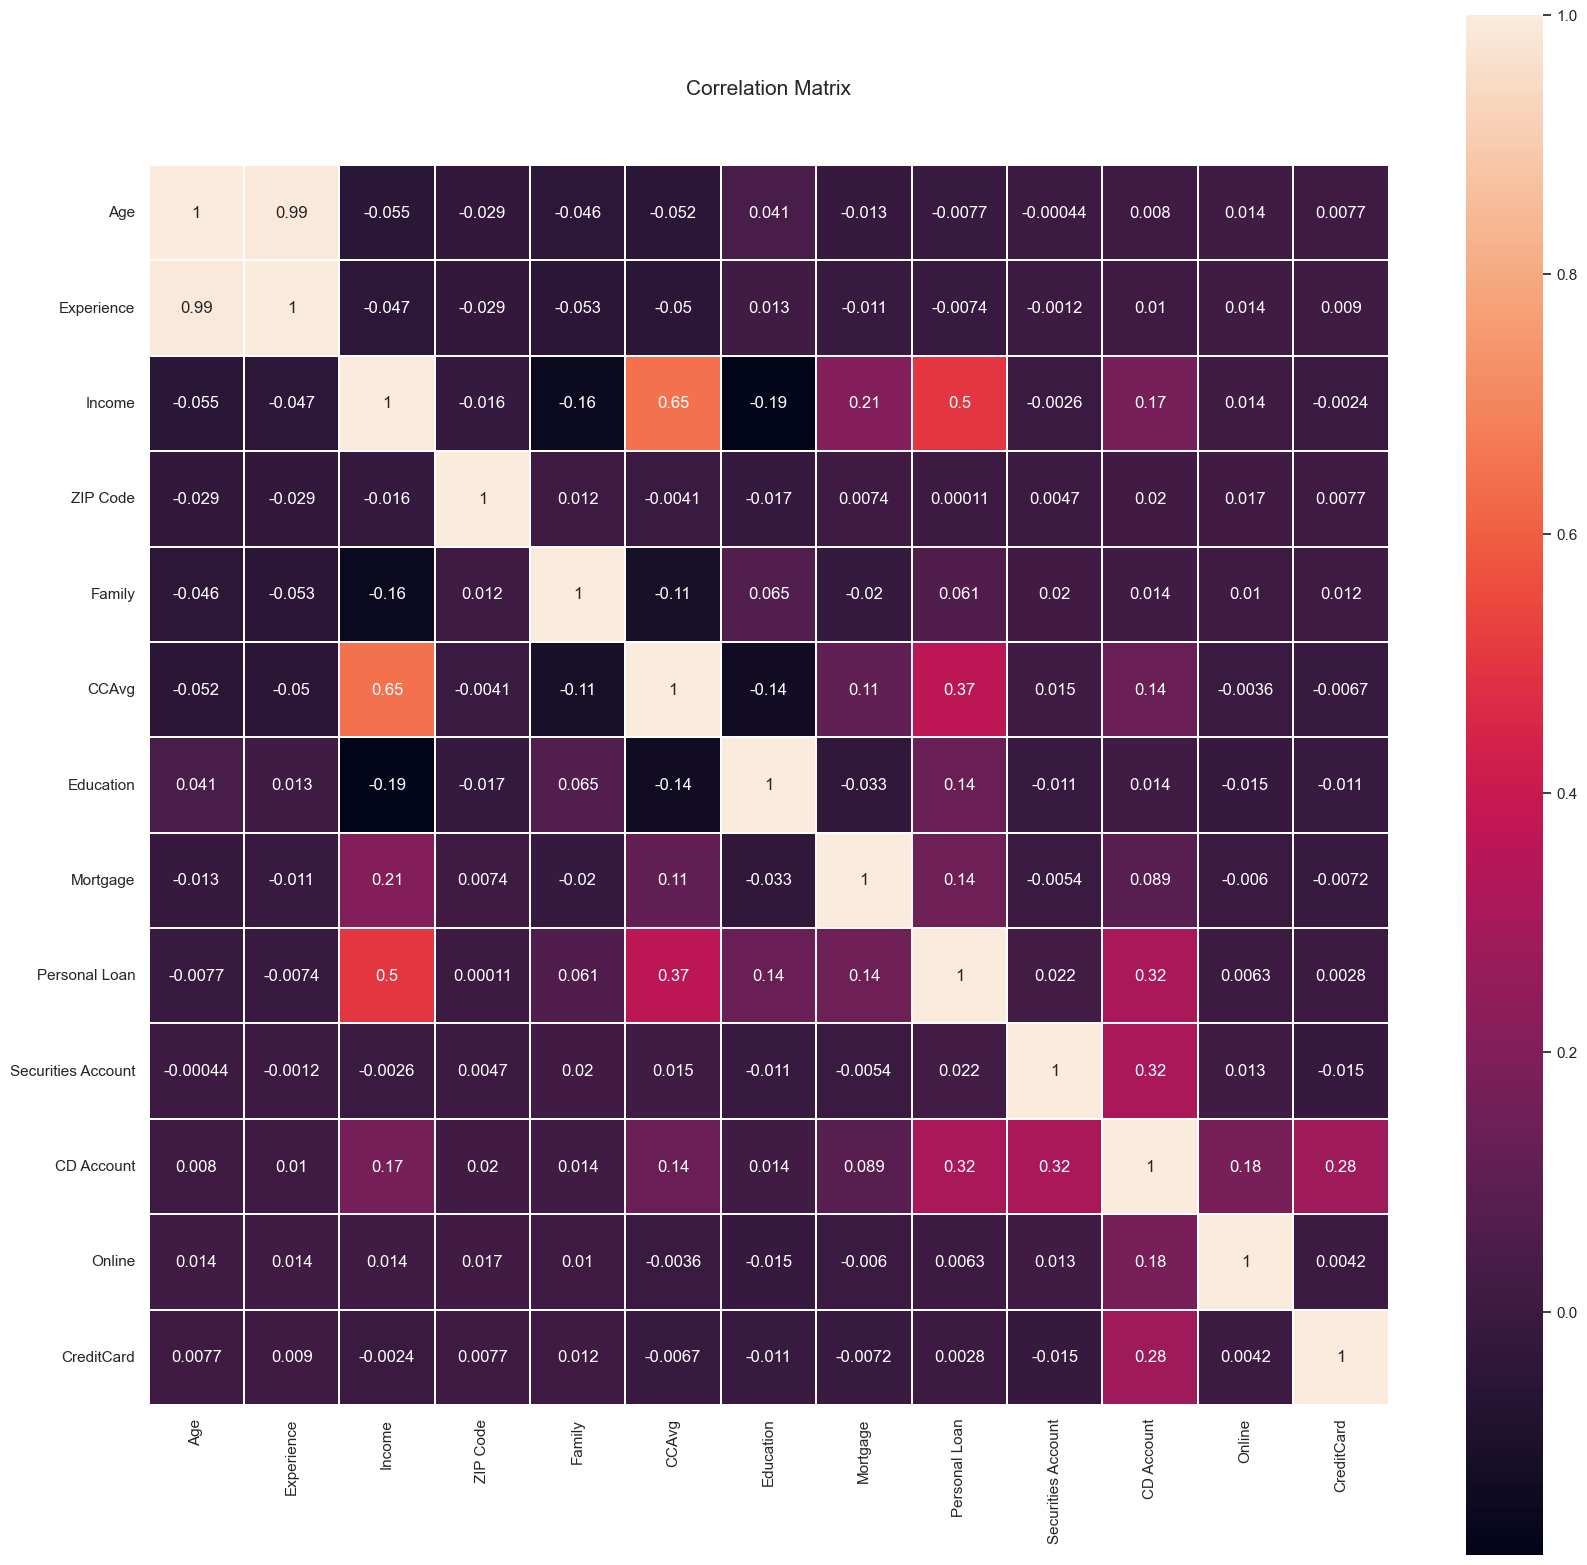

In [42]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(dataset3.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

As per the Correlation Graph, There are several columns which are correlated to the target class column. Columns like Credit Account etc. are correlated

In [43]:
label3 = dataset3['Personal Loan']
dataset3 = dataset3.drop(columns=['Personal Loan',])

Split the Dataset in Training and Test Set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(dataset3, label3, stratify=label3, random_state=0)

In [45]:
feature_names = dataset3.columns.to_list()
feature_names

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [46]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
ypred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(ypred_rfc, y_test)

print(rfc_accuracy*100, "%")

98.56 %


In [48]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [49]:
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values()
feature_importances


Securities Account    0.004220
Online                0.006909
CreditCard            0.008463
Mortgage              0.031896
Experience            0.032455
Age                   0.033067
ZIP Code              0.033444
CD Account            0.050517
Family                0.107681
CCAvg                 0.151129
Education             0.196594
Income                0.343624
dtype: float64

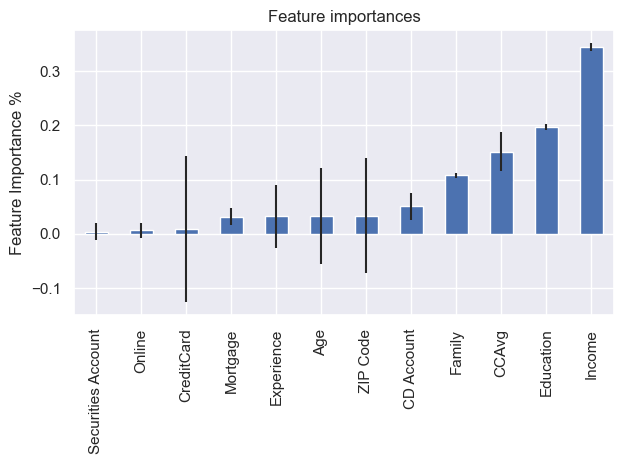

In [53]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance %")
fig.tight_layout()

In [51]:
features_df = pd.DataFrame({"Feature": feature_importances.index, "Importance": feature_importances.values})
features_df

,Feature,Importance
0,Securities Account,0.004220
1,Online,0.006909
2,CreditCard,0.008463
3,Mortgage,0.031896
4,Experience,0.032455
5,Age,0.033067
6,ZIP Code,0.033444
7,CD Account,0.050517
8,Family,0.107681
9,CCAvg,0.151129


In [52]:
features_df.to_csv("importances/feature_importances3.csv", index_label=False)